In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from sklearn import ensemble

In [53]:
def visualize_features(df, traget_col):
    explore = sns.PairGrid(data=df.query('UnitNumber < 10') ,
                 x_vars=traget_col,
                 y_vars=["Op_Setting_1","Op_Setting_2","Op_Setting_3","Sensor_2", "Sensor_3", "Sensor_4", "Sensor_7", "Sensor_8", "Sensor_9", "Sensor_11", "Sensor_12", "Sensor_13", "Sensor_14", "Sensor_15", "Sensor_17", "Sensor_20", "Sensor_21"],
                 hue="UnitNumber", height=3, aspect=2.5)
    explore = explore.map(plt.scatter, alpha=0.5)
    explore = explore.set(xlim=(400,0))
    explore = explore.add_legend()
    explore.savefig("EDA_output/feature_pairGrid.png")
    # operational setting 3 is stable, let's visualize op setting 1 and 2 against some of the most active sensors
    settings = sns.pairplot(data=df.query('UnitNumber < 10'),
                 x_vars=["Op_Setting_1","Op_Setting_2"],
                 y_vars=["Sensor_2", "Sensor_3", "Sensor_4", "Sensor_7", "Sensor_8", "Sensor_9", "Sensor_11", "Sensor_12", "Sensor_13", "Sensor_14", "Sensor_15", "Sensor_17", "Sensor_20", "Sensor_21"],
                 hue="UnitNumber", aspect=1)
    settings.savefig("EDA_output/OpSettings_pairPlot.png")
    
    return

In [69]:
def feature_importance(df, target_col, cols_drop):
    # clear out target leakage , Failure column will be used only for classification problem 
    train_no_leakage = df.drop(cols_drop, axis = 1)
    # set up features and target variable 
    Y = train_no_leakage[target_col]
    X = train_no_leakage.drop([target_col], axis = 1)
    
    # create an exhuastive random forest (300 trees up to 20 levels deep)

    rf = ensemble.RandomForestRegressor()
    single_rf = ensemble.RandomForestRegressor(n_estimators = 300, max_depth = 20)
    single_rf.fit(X, Y)
    y_pred = single_rf.predict(X)
    
    # list feature importance
    important_features = pd.DataFrame()
    important_features['features']=X.columns
    important_features['value']=single_rf.feature_importances_
    important_features.sort_values('value',ascending=False,inplace=True)
    
    
    f, ax = plt.subplots(figsize=(11, 9))
    plt.title("Feature ranking", fontsize = 20)
    plt.bar(important_features['features'], important_features['value'], color="b", align="center")
    plt.ylabel("Importance", fontsize = 18)
    plt.xlabel("Features", fontsize = 18)
    plt.xticks(rotation=90)
    plt.savefig("EDA_output/FeatureRanking.png")
    
    return

In [63]:
train_df=pd.read_csv('PAM_train.csv')
test_df=pd.read_csv('PAM_test.csv')

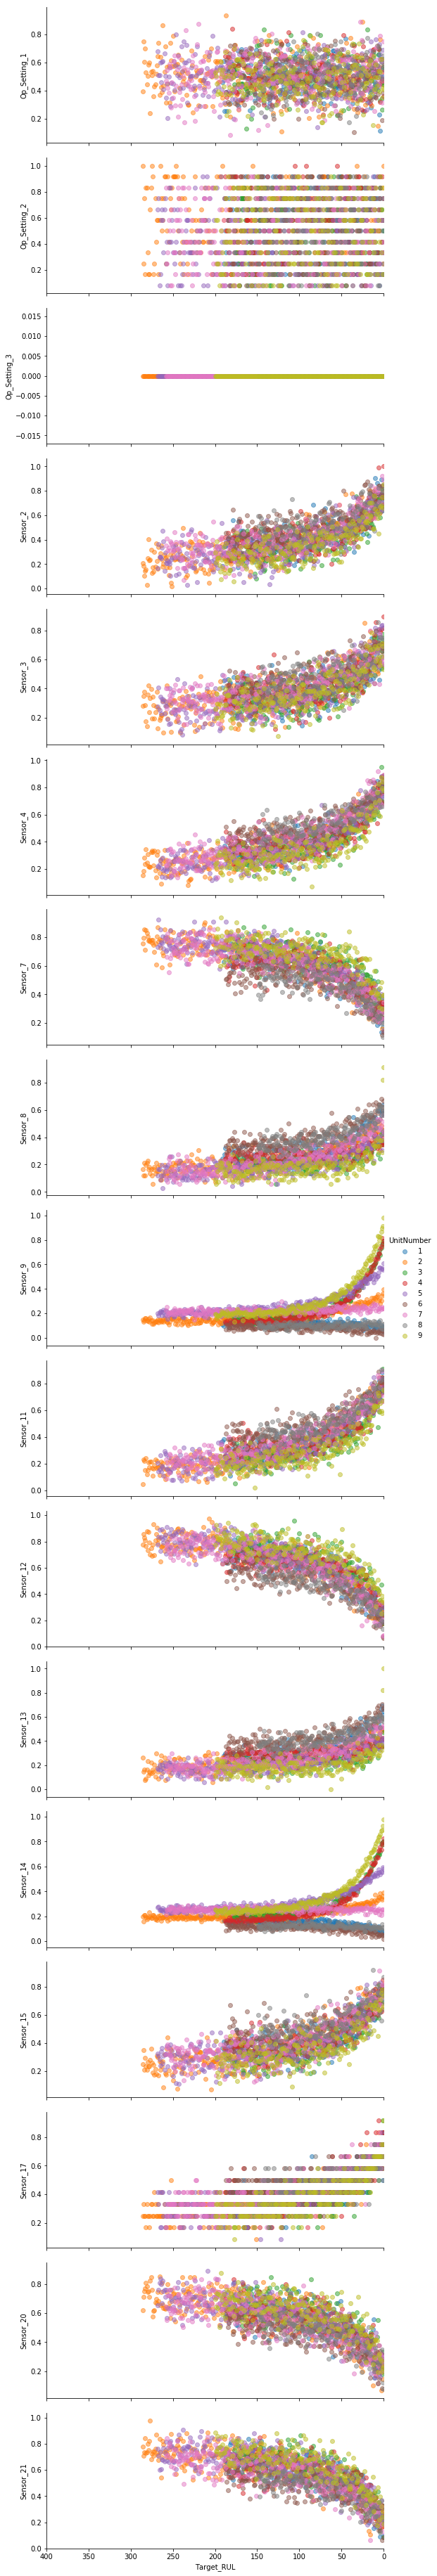

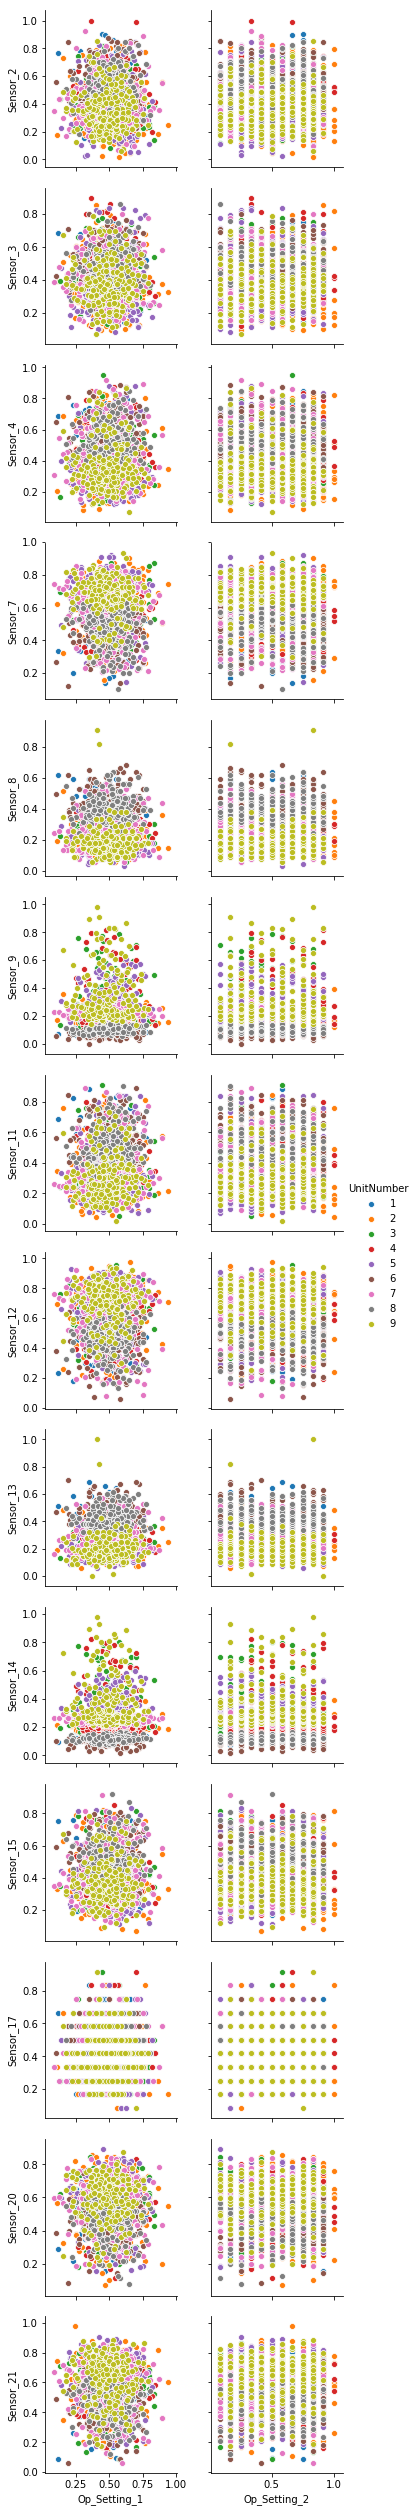

In [56]:
visualize_features(train_df, 'Target_RUL')

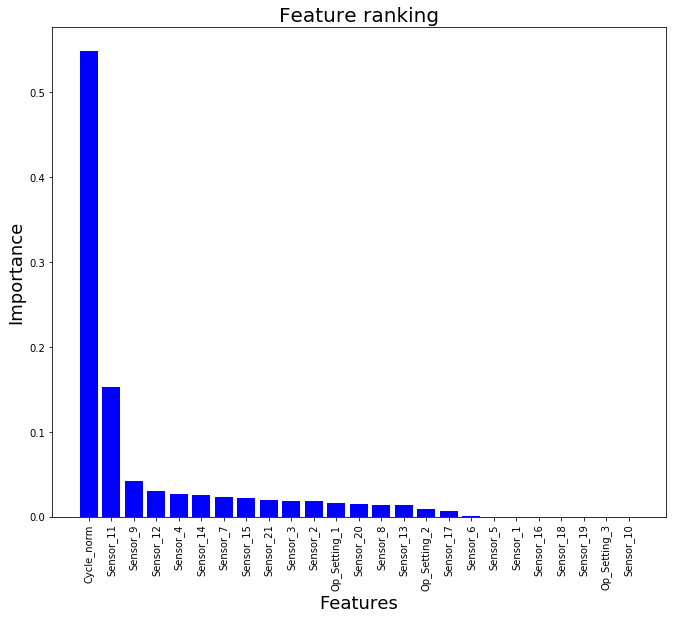

In [70]:
col_drop = ['UnitNumber', 'Cycle','Failure'] 
feature_importance(train_df,'Target_RUL', col_drop)